In [2]:
import os
import pandas

# on se crée une liste d'adresses disques contenant les vidéos
listeAdresse = ['./data/x264-1908-caire-wasm/x264-results1.csv',
 './data/x264-0408-deadline-wasm/x264-results1.csv',
 './data/x264-0308-news-wasm/x264-results1.csv',
 './data/x264-2108-forester-wasm/x264-results1.csv',
 './data/x264-0308-crowd_run-wasm/x264-results1.csv',
 './data/x264-1908-flower-wasm/x264-results1.csv',
 './data/x264-0308-mobilesif-wasm/x264-results1.csv',
 './data/x264-1908-footballcif-wasm/x264-results1.csv',
 './data/x264-2108-netflix-wasm/x264-results1.csv',
 './data/x264-1908-husky-wasm/x264-results1.csv',
 './data/x264-0608-people-wasm/x264-results1.csv',
 './data/x264-1908-bridgefar-wasm/x264-results1.csv',
 './data/x264-0308-sintel-wasm/x264-results1.csv',
 './data/x264-2108-bridgeclose-wasm/x264-results1.csv',
 './data/x264-0408-tos3k-wasm/x264-results1.csv',
 './data/x264-0208-crowd_run-bermuda-wasm/x264-results1.csv',
 './data/x264-0608-coastmp4-wasm-merged/x264-results1.csv',
 './data/x264-2108-ghotism-wasm/x264-results1.csv',
 './data/x264-0508-soccer-wasm/x264-results1.csv',
 './data/x264-0208-sintel-calda-wasm/x264-results1.csv',
 './data/x264-1908-ice-wasm/x264-results1.csv',
 './data/x264-0408-football-wasm/x264-results1.csv',
 './data/x264-1908-tennis-wasm/x264-results1.csv',
 './data/x264-1908-mobilepro-wasm/x264-results1.csv',
 './data/x264-1908-akiyo-wasm/x264-results1.csv',
 './data/x264-0608-park-wasm/x264-results1.csv',
 './data/x264-0608-blue-wasm/x264-results1.csv',
 './data/x264-1908-riverbed-wasm/x264-results1.csv',
 './data/x264-0608-tractor-wasm/x264-results1.csv',
 './data/x264-1908-football15-wasm/x264-results1.csv',
 './data/x264-1908-sunflowers-wasm/x264-results1.csv',
 './data/x264-0308-ducks-wasm/x264-results1.csv',
 './data/x264-1908-waterfall-wasm/x264-results1.csv',
 './data/x264-1908-students-wasm/x264-results1.csv']

#on crée ensuite la liste des données sur chacune des vidéos
listeVideo = []

for adresse in listeAdresse:
    listeVideo.append(pandas.read_csv(open(adresse,"r")))

# on teste l'affichage des données de la première vidéo
listeVideo[0][0:5]
    

,configurationID,H264,no_8x8dct,no_asm,no_cabac,no_deblock,no_fast_pskip,no_mbtree,no_mixed_refs,no_weightb,rc_lookahead,ref,size,usertime,systemtime,elapsedtime
0,1,True,True,False,False,True,True,False,True,True,20,9,78801,1.336,0.068,0.695
1,10,True,True,False,True,False,True,False,False,True,40,9,86351,1.588,0.064,0.603
2,100,True,True,False,False,True,False,True,True,False,40,1,90758,0.928,0.036,0.284
3,1000,True,True,False,True,False,True,True,True,False,40,9,98511,1.348,0.020,0.415
4,1001,True,False,False,False,True,False,False,True,False,60,5,85191,1.072,0.044,0.362


regression polynomiale

In [70]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import pandas
from matplotlib import pyplot as plt
import sobol_seq
import math
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline

source =  listeVideo[21]

r2_reg = []
for aux in listeVideo:
    
    x = np.asarray(source[['H264','no_8x8dct','no_asm','no_cabac','no_deblock',
             'no_fast_pskip','no_mbtree','no_mixed_refs',
             'no_weightb','rc_lookahead','ref','usertime','systemtime']])
    
    y = np.ravel(aux[['elapsedtime']])

    r2 = []
    for i in range(1,65):
        pct_test=1-16*i/len(y)
        X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=pct_test, random_state=42)
        polynomial_features = PolynomialFeatures(degree=2)
        linear_regression = LinearRegression()
        regr = Pipeline([("polynomial_features", polynomial_features),
                         ("linear_regression", linear_regression)])
        regr.fit(X_train, y_train)
        prediction = regr.predict(X_test)
        r2.append(r2_score(y_test, prediction))

    r2_reg.append(r2)
    
data_sobol = pandas.DataFrame(data=r2_reg)

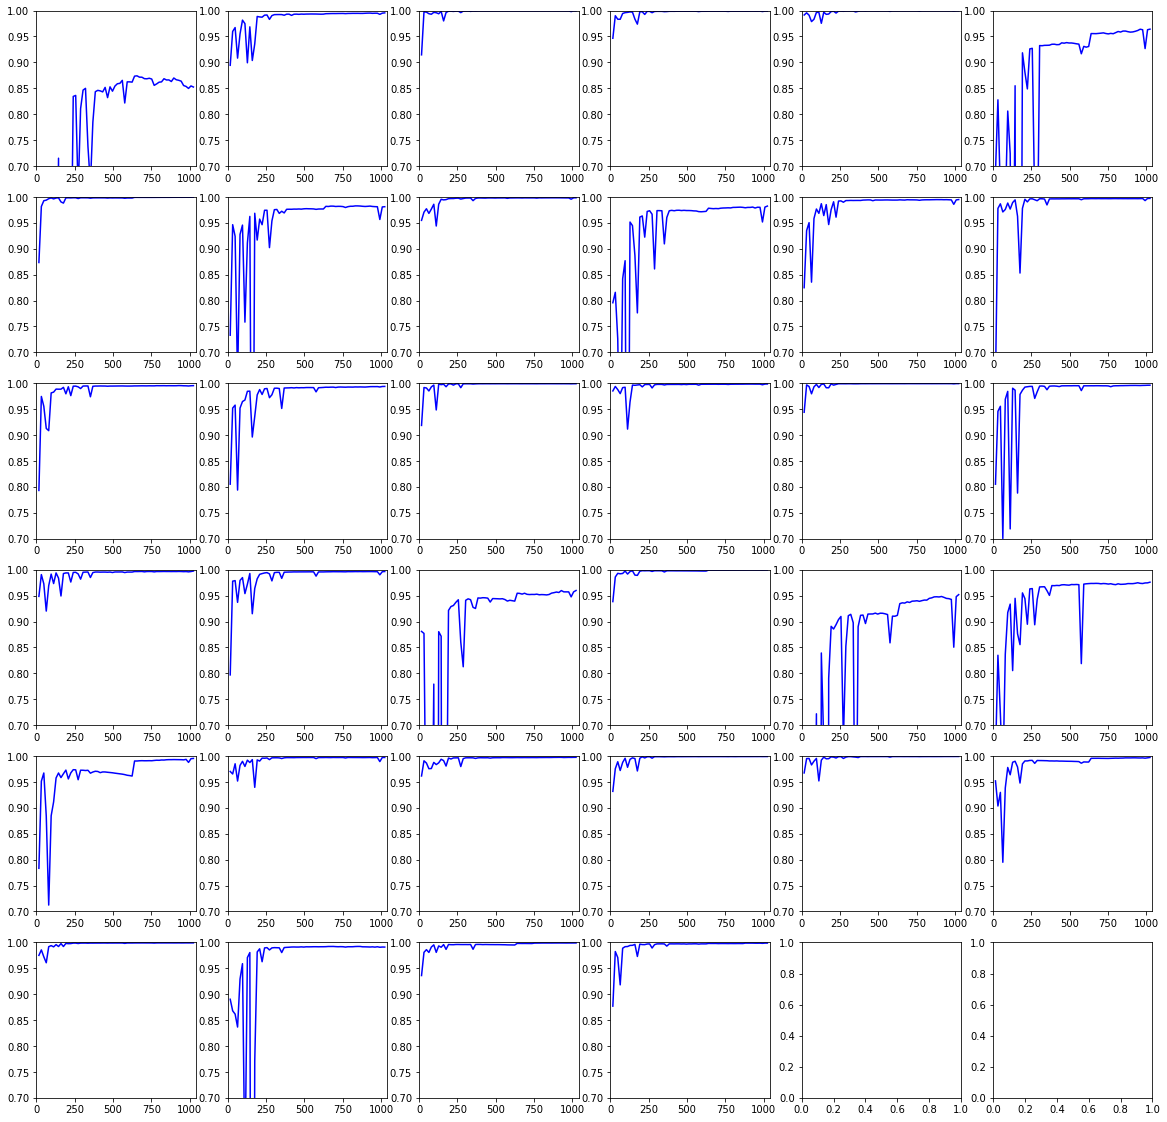

In [71]:
import numpy as np
from matplotlib import pyplot as plt

taille = 6
plt.subplots(nrows=taille,ncols=taille,figsize=(20, 20))

for i in range(taille):
    for j in range(taille):
        plt.subplot(taille,taille,taille*i+j+1)
        x1=np.asarray(data_sobol[taille*i+j:taille*i+j+1])
        if taille*i+j<34:
            plt.axis([0,1040,0.7,1])
            plt.plot(range(16,1040,16),x1[0],c="blue")
plt.show()

with degree 3, long & instable

Sobol vs train_test_split

In [77]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import pandas
from matplotlib import pyplot as plt
import sobol_seq
import math
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline

vec = sobol_seq.i4_sobol_generate(1, 1152)*1152
indices = vec.tolist()

#deuxième indice de la sequence de sobol
listeSobol = []
for i in range(1152):
    listeSobol.append(math.floor(indices[i][0]))
    
listeSobol



source =  listeVideo[21]

r2_pas_sobol = []
for aux in listeVideo:
    
    x = np.asarray(source[['H264','no_8x8dct','no_asm','no_cabac','no_deblock',
             'no_fast_pskip','no_mbtree','no_mixed_refs',
             'no_weightb','rc_lookahead','ref','usertime','systemtime','elapsedtime']])
    
    y = np.ravel(aux[['elapsedtime']])

    r2 = []
    for i in range(1,65):
        pct_test=1-16*i/len(y)
        taille_train = math.floor((1-pct_test)*1152)
        ind_train = listeSobol[1:taille_train]
        ind_test  = listeSobol[taille_train+1:len(listeVideo[21])]
        X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=pct_test, random_state=42)
        regr =  RandomForestRegressor()
        regr.fit(X_train, y_train)
        prediction = regr.predict(X_test)
        r2.append(r2_score(y_test, prediction))

    r2_pas_sobol.append(r2)
    
data_sobol = pandas.DataFrame(data=r2_pas_sobol)

r2_sobol = []
for aux in listeVideo:
    
    x = np.asarray(source[['H264','no_8x8dct','no_asm','no_cabac','no_deblock',
             'no_fast_pskip','no_mbtree','no_mixed_refs',
             'no_weightb','rc_lookahead','ref','usertime','systemtime','elapsedtime']])
    
    y = np.ravel(aux[['elapsedtime']])

    r2 = []
    for i in range(1,65):
        pct_test=1-16*i/len(y)
        taille_train = math.floor((1-pct_test)*1152)
        ind_train = listeSobol[1:taille_train]
        ind_test  = listeSobol[taille_train+1:len(listeVideo[21])]
        X_train, X_test, y_train, y_test = x[ind_train], x[ind_test], y[ind_train], y[ind_test]
        regr =  RandomForestRegressor()
        regr.fit(X_train, y_train)
        prediction = regr.predict(X_test)
        r2.append(r2_score(y_test, prediction))

    r2_sobol.append(r2)
    
data_sobol = pandas.DataFrame(data=r2_sobol)

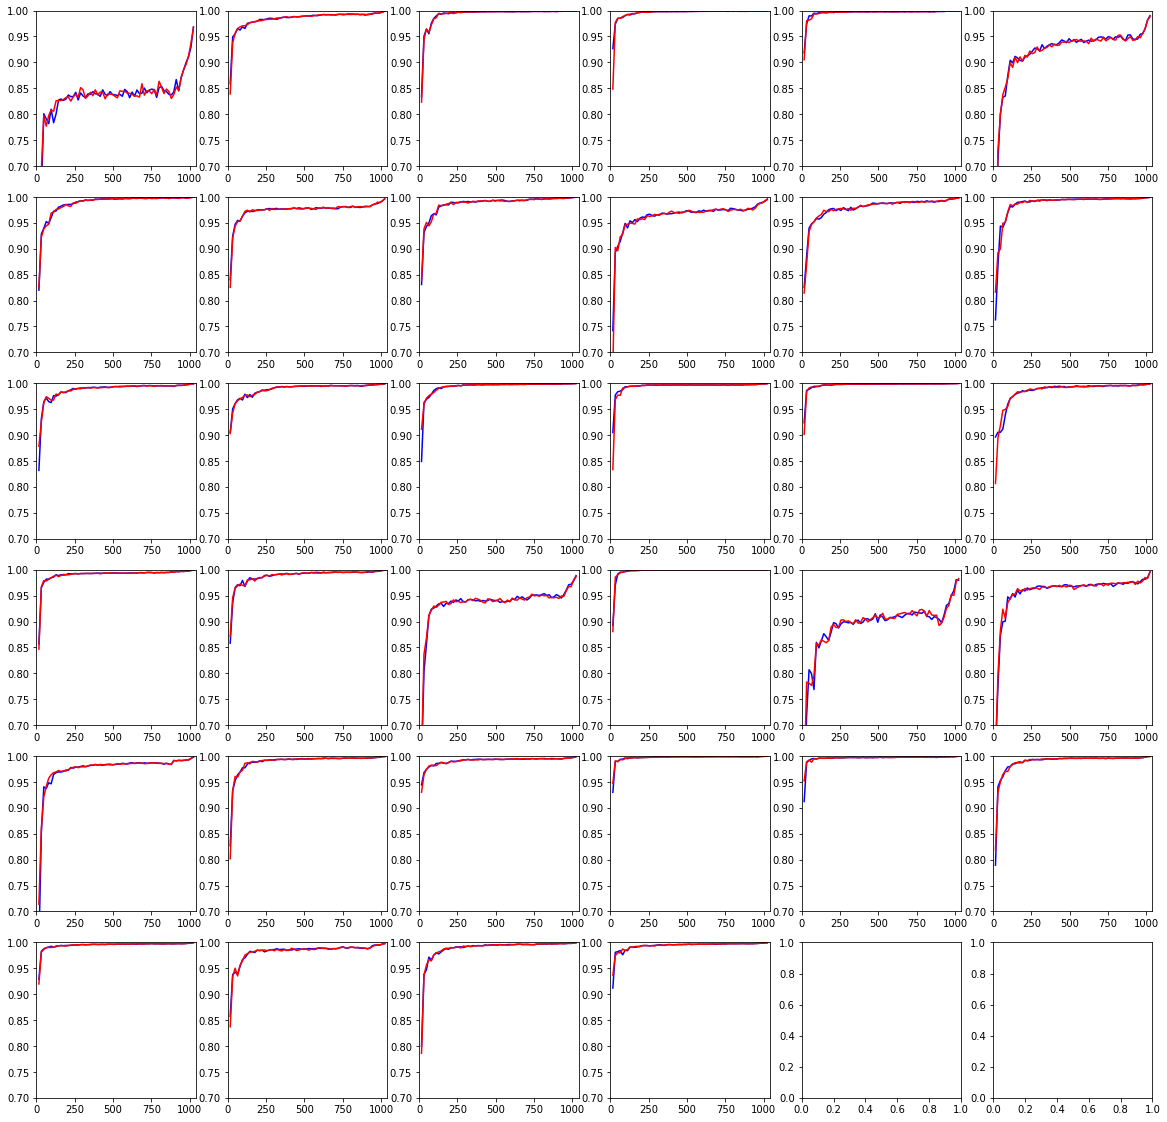

In [78]:
import numpy as np
from matplotlib import pyplot as plt

taille = 6
plt.subplots(nrows=taille,ncols=taille,figsize=(20, 20))

for i in range(taille):
    for j in range(taille):
        plt.subplot(taille,taille,taille*i+j+1)
        x1=np.asarray(data_sobol[taille*i+j:taille*i+j+1])
        x2=np.asarray(data_pas_sobol[taille*i+j:taille*i+j+1])
        if taille*i+j<34:
            plt.axis([0,1040,0.7,1])
            plt.plot(range(16,1040,16),x1[0],c="blue")
            plt.plot(range(16,1040,16),x2[0],c="red")
plt.show()